# Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [159]:
# USD-PHP Exchange Rate
exchangeRate = pd.read_csv("../datasets/USD_PHP Historical Data.csv")

# Inflation Rates
inflationPh = pd.read_csv("../datasets/PH Core Inf Rate monthly.csv")
inflationUS = pd.read_csv("../datasets/USA Core Inf Rate.csv")

# Interest Rates
interestRatePh = pd.read_csv("../datasets/BSP Interest Rate in percent.csv")
interestRateUS = pd.read_csv("../datasets/DFF Interest Rate.csv")

# Oil prices
oilPriceBrent = pd.read_csv("../datasets/Brent Oil Futures Historical Data.csv")
oilPriceCrude = pd.read_csv("../datasets/Crude Oil WTI Futures Historical Data.csv")


In [160]:
datasets = {
    "exchangeRate": exchangeRate,
    "inflationPh": inflationPh,
    "inflationUS": inflationUS,
    "interestRateUS": interestRateUS,
    "interestRatePh": interestRatePh,
    "oilPriceBrent": oilPriceBrent,
    "oilPriceCrude": oilPriceCrude
}

for k, i in datasets.items():
    head = i.head()
    print(f"{k}")
    print(f"{head}\n\n")

exchangeRate
         Date   Price    Open    High     Low Vol. Change %
0  12/08/2025  59.098  58.993  59.395  58.890  NaN    0.27%
1  12/05/2025  58.940  59.131  59.141  58.899  NaN   -0.32%
2  12/04/2025  59.130  58.942  59.213  58.905  NaN    0.22%
3  12/03/2025  58.999  58.557  59.096  58.522  NaN    0.60%
4  12/02/2025  58.647  58.456  58.784  58.334  NaN    0.40%


inflationPh
   Year     Month  Unnamed: 2  Inflation Rate  Unnamed: 4
0  1958   January         NaN             6.3         NaN
1  1958  February         NaN             6.3         NaN
2  1958     March         NaN             5.5         NaN
3  1958     April         NaN             5.5         NaN
4  1958       May         NaN             6.3         NaN


inflationUS
  observation_date  CORESTICKM159SFRBATL
0       1968-01-01              3.651861
1       1968-02-01              3.673819
2       1968-03-01              4.142164
3       1968-04-01              4.155828
4       1968-05-01              4.088245


int

In [161]:
for k, i in datasets.items():
    info = i.info()
    print(f"{k}")
    print(f"{info}\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2071 non-null   object 
 1   Price     2071 non-null   float64
 2   Open      2071 non-null   float64
 3   High      2071 non-null   float64
 4   Low       2071 non-null   float64
 5   Vol.      1058 non-null   object 
 6   Change %  2071 non-null   object 
dtypes: float64(4), object(3)
memory usage: 113.4+ KB
exchangeRate
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            814 non-null    int64  
 1   Month           814 non-null    object 
 2   Unnamed: 2      0 non-null      float64
 3   Inflation Rate  814 non-null    float64
 4   Unnamed: 4      0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usa

In [162]:
for k, i in datasets.items():
    shape = i.shape
    null = i.isna().sum()
    print(f"{k}")
    print(f"shape: {shape}\n{null}\n\n")

exchangeRate
shape: (2071, 7)
Date           0
Price          0
Open           0
High           0
Low            0
Vol.        1013
Change %       0
dtype: int64


inflationPh
shape: (814, 5)
Year                0
Month               0
Unnamed: 2        814
Inflation Rate      0
Unnamed: 4        814
dtype: int64


inflationUS
shape: (693, 2)
observation_date        0
CORESTICKM159SFRBATL    0
dtype: int64


interestRateUS
shape: (2896, 2)
observation_date    0
DFF                 0
dtype: int64


interestRatePh
shape: (10404, 3)
Period            0
RRP Rate          0
Unnamed: 2    10404
dtype: int64


oilPriceBrent
shape: (22, 7)
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


oilPriceCrude
shape: (2086, 7)
Date         0
Price        0
Open         0
High         0
Low          0
Vol.        84
Change %     0
dtype: int64




In [163]:
for k, i in datasets.items():
    i.dropna(axis=1, inplace=True)
    print(f"{k}")
    info = i.info()
    print("\n\n")

exchangeRate
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2071 non-null   object 
 1   Price     2071 non-null   float64
 2   Open      2071 non-null   float64
 3   High      2071 non-null   float64
 4   Low       2071 non-null   float64
 5   Change %  2071 non-null   object 
dtypes: float64(4), object(2)
memory usage: 97.2+ KB



inflationPh
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            814 non-null    int64  
 1   Month           814 non-null    object 
 2   Inflation Rate  814 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.2+ KB



inflationUS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 2 

# Preprocessing

### Exchange Rate

In [164]:
# converting the datetime into ISO Format and making it its index

exchangeRate['Date'] = pd.to_datetime(exchangeRate['Date'], format='mixed')

exchangeRate.sort_values(by='Date', inplace=True)
exchangeRate.set_index('Date', inplace=True)

In [175]:
# processing the change % string into numeric

if exchangeRate['Change %'].dtype == 'object':
    exchangeRate['Change %'] = exchangeRate['Change %'].str.replace('%', '', regex=False)
exchangeRate['Change %'] = pd.to_numeric(exchangeRate['Change %'])

### Inflation US and Ph

In [165]:
# fixing the date by combining two columns and droppng them

inflationPh["Date"] = pd.to_datetime(
    inflationPh["Year"].astype(str) + "-" + inflationPh["Month"] + "-01",
    format="%Y-%B-%d",
    errors="coerce"
)

inflationPh.drop(columns=["Year", "Month"], inplace=True)
inflationPh.set_index('Date', inplace=True)

In [166]:
# converting the date into ISO format and renaming the column

inflationUS['Date'] = pd.to_datetime(inflationUS['observation_date'], format='mixed')

inflationUS.drop(columns=['observation_date'], inplace=True)
inflationUS.sort_values(by='Date', inplace=True)
inflationUS.rename(columns={
    "CORESTICKM159SFRBATL": "inflation Rate"
}, inplace=True)
inflationUS.set_index('Date', inplace=True)

### Interest Rate Ph and US

In [167]:
# Renaming the column and converting the date into iso format

interestRatePh.rename(columns={
    "Period": "Date"
}, inplace=True)

interestRatePh['Date'] = pd.to_datetime(interestRatePh['Date'], format='mixed')

interestRatePh.sort_values(by='Date', inplace=True)
interestRatePh.set_index('Date', inplace=True)

In [168]:
# converting the placeholders in RRP rate

placeholders = {
    "-": np.nan,
    ".": 0.0,
    "..": 0.0,
    "...": np.nan
}

interestRatePh['RRP Rate'] = interestRatePh['RRP Rate'].replace(placeholders)
interestRatePh['RRP Rate'] = pd.to_numeric(interestRatePh['RRP Rate'])

In [169]:
# converting the dates into iso format

interestRateUS.rename(columns={
    "observation_date": "Date"
}, inplace=True)

interestRateUS['Date'] = pd.to_datetime(interestRateUS['Date'], format='mixed')

interestRateUS.sort_values(by='Date', inplace=True)
interestRateUS.set_index('Date', inplace=True)

### Oil Prices Brent and Crude

In [170]:
# converting the dates into iso format

oilPriceBrent['Date'] = pd.to_datetime(oilPriceBrent['Date'], format='mixed')

oilPriceBrent.sort_values(by='Date', inplace=True)
oilPriceBrent.set_index('Date', inplace=True)

In [180]:
# processing the change % string into numeric

if oilPriceBrent['Change %'].dtype == 'object':
    oilPriceBrent['Change %'] = oilPriceBrent['Change %'].str.replace('%', '', regex=False)
oilPriceBrent['Change %'] = pd.to_numeric(oilPriceBrent['Change %'])

In [171]:
# converting the dates into iso format

oilPriceCrude['Date'] = pd.to_datetime(oilPriceCrude['Date'], format='mixed')

oilPriceCrude.sort_values(by='Date', inplace=True)
oilPriceCrude.set_index('Date', inplace=True)

In [182]:
# processing the change % string into numeric

if oilPriceCrude['Change %'].dtype == 'object':
    oilPriceCrude['Change %'] = oilPriceCrude['Change %'].str.replace('%', '', regex=False)
oilPriceCrude['Change %'] = pd.to_numeric(oilPriceCrude['Change %'])

In [192]:
# combining the datasets together into one big dataset called main

for k, i in datasets.items():
    print(f"{k}\n")
    print(f"{i.columns}\n\n")

exchangeRate

Index(['Price', 'Open', 'High', 'Low', 'Change %', 'Log_Return',
       'Rolling_Volatility'],
      dtype='object')


inflationPh

Index(['Inflation Rate'], dtype='object')


inflationUS

Index(['inflation Rate'], dtype='object')


interestRateUS

Index(['DFF'], dtype='object')


interestRatePh

Index(['RRP Rate'], dtype='object')


oilPriceBrent

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


oilPriceCrude

Index(['Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')




# Analysis

### I. The USD–PHP exchange rate during the pandemic period (2020–2025).

In [183]:
# using the exchangeRate dataset

# Calculating monthly average from daily values

monthly_avg = exchangeRate['Price'].resample('ME').mean()

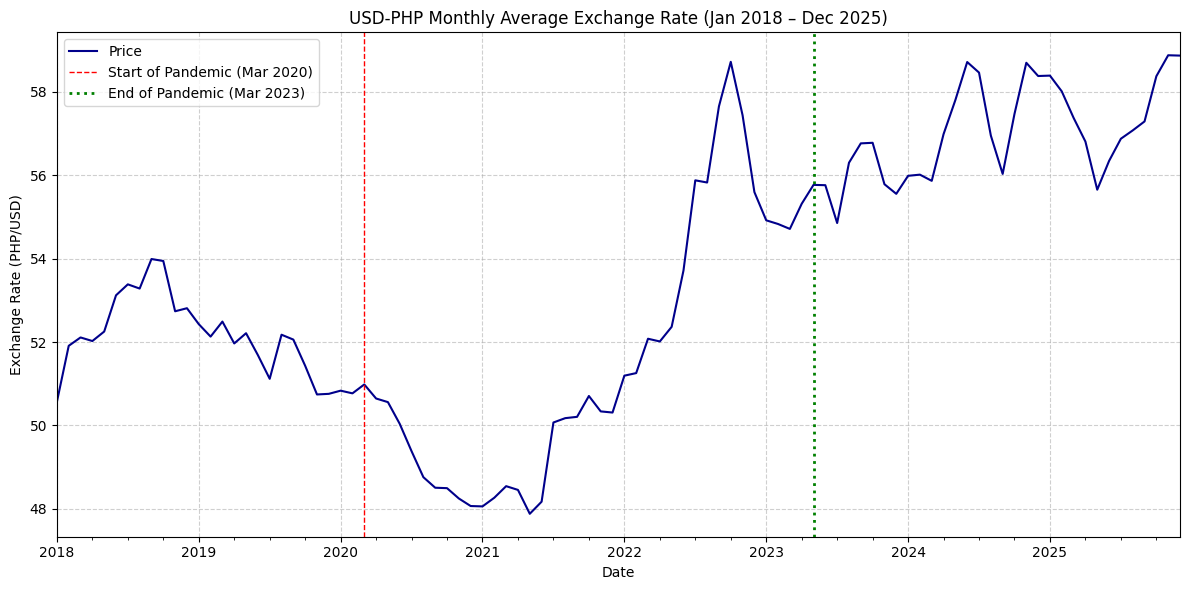

In [ ]:
plt.figure(figsize=(12, 6))
monthly_avg.plot(title='USD-PHP Monthly Average Exchange Rate (Jan 2018 – Dec 2025)', color='darkblue')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=1, label='Start of Pandemic (Mar 2020)')
# plt.axvline(pd.to_datetime('2022-01-01'), color='green', linestyle=':', linewidth=2, label='Start of Fed Hikes / Major Depreciation (Jan 2022)')
plt.axvline(pd.to_datetime('2023-05-01'), color='green', linestyle=':', linewidth=2, label='End of Pandemic (Mar 2023)')

plt.xlabel('Date')
plt.ylabel('Exchange Rate (PHP/USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# interpretation

We can observe based from the data that there is a dip between 2020 and 2022, but then rises up signicantly between 2022 and 2023 and never got down below 54 pesos since then.

# Daily volatility change from pre-pandemic (2018–2019) vs. pandemic/post-pandemic (2020–2025)

In [187]:
# Calculate the log returns and rolling volatility in exchangeRate

exchangeRate['Log_Return'] = np.log(exchangeRate['Price'] / exchangeRate['Price'].shift(1))
window = 20
exchangeRate['Rolling_Volatility'] = exchangeRate['Log_Return'].rolling(window=window).std() * np.sqrt(252)



pre_pandemic_vol = exchangeRate.loc['2018':'2019', 'Rolling_Volatility'].mean()
pandemic_vol = exchangeRate.loc['2020':'2025', 'Rolling_Volatility'].mean()

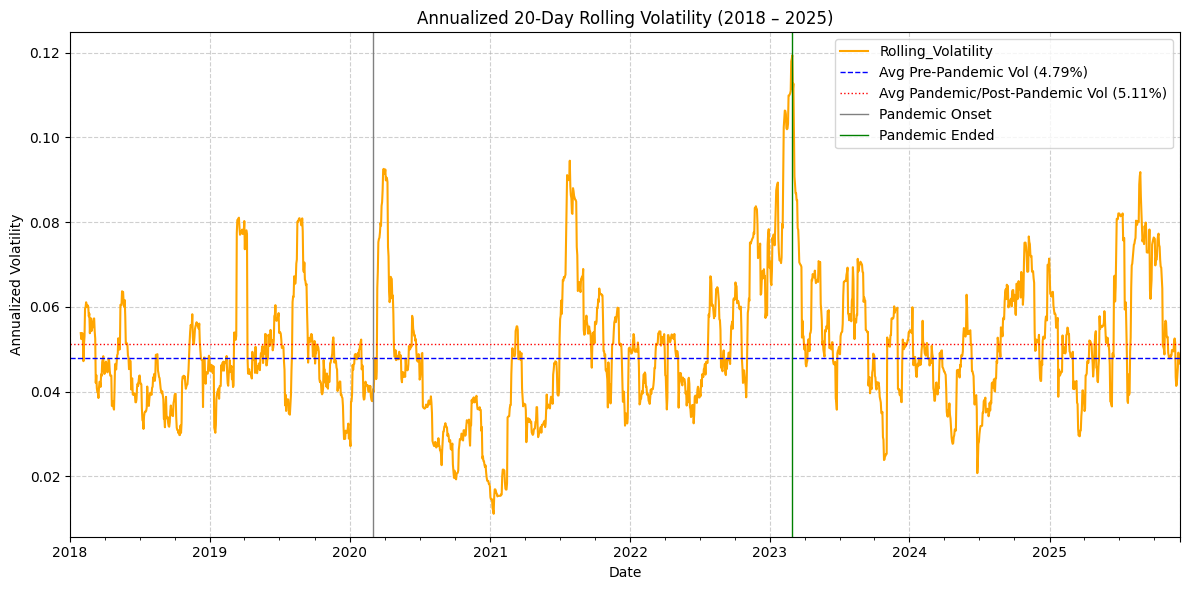

In [189]:
plt.figure(figsize=(12, 6))
exchangeRate['Rolling_Volatility'].plot(title='Annualized 20-Day Rolling Volatility (2018 – 2025)', 
                                        color='orange')

plt.axhline(pre_pandemic_vol, color='blue', linestyle='--', linewidth=1, 
            label=f'Avg Pre-Pandemic Vol ({pre_pandemic_vol * 100:.2f}%)')
plt.axhline(pandemic_vol, color='red', linestyle=':', linewidth=1, 
            label=f'Avg Pandemic/Post-Pandemic Vol ({pandemic_vol * 100:.2f}%)')

plt.axvline(pd.to_datetime('2020-03-01'), color='gray', linestyle='-', linewidth=1, 
            label='Pandemic Onset')

plt.axvline(pd.to_datetime('2023-03-01'), color='green', linestyle='-', linewidth=1, 
            label='Pandemic Ended')
    
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# USD–PHP show seasonal patterns during the pandemic period (2020–2025)

<Figure size 1200x1000 with 0 Axes>

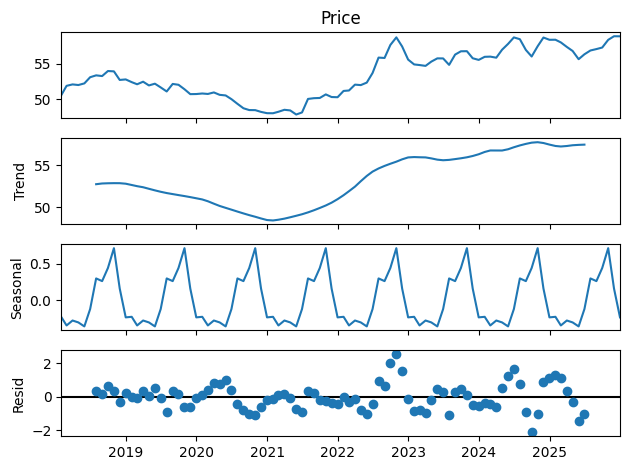

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_avg, model='additive')

plt.figure(figsize=(12, 10))
decomposition.plot()
plt.tight_layout()
plt.show()